### Problem Statement

 This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Objective of the bank

To transform the liability customers to loan customers. They are trying to increase the success rate of the loan compaign. Hence, they are trying to identifying the potential customers who have the higher propability of purchasing the loan

### Aproach

1. Import the necessary libraries
2. Pre-processing and EDA
3. Feature Selection 
4. Build the model using machine learning techniques
5. Evaluate the model using metrics

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.show()
%matplotlib inline

sns.set(style='ticks')


### Read the data

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv') #read the data as dataframe

## 1. Read the column description and ensure you understand each attribute well

In [3]:
df.columns #To list all the columns in the data

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Columns Description

**Categorical Variables:**                      

>**_Education_ :** Customer's Education Qualification Level    
>**_Family_ :**  Family size of the customer

**Oradinal variables:**     

>**_Age_:** Age of the Customer                                                                                                 
>**_Experience_:** Years of Professional Experience                                                                             
>**_Income_:** Anual income of the customer                                                                                     
>**_Mortage_:** Customer's house value if any                                                                                  
>**_CCAvg_:** Average spending on credit card    


**Nominal:** 

>**_ID_:** Customer Id                                                                                                         
>**_Zip Code_:** Customer residential address zip code 

**Binary Variables:**  

>**_Personal Loan_:** Customer's response to personal loan campaign. Whether customer accepted the personal load ?                                                                                                                  
>**_Securities Account_:** Any customer's securities account in this bank ?                                 
>**_CD Account_:** Any Credit of Deposit in this Bank ?                                                     
>**_Online_:** Does customer's use online banking (netbanking) facilities ?                                              
>**_CreditCard_:** Customer's Credit Card usage                                                                                 

### EDA Basics 

In [4]:
print("The data has Rows {}, Columns {}".format(*df.shape))     #Find the shape of the data

The data has Rows 5000, Columns 14


In [5]:
df.info()   #Info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


> **The data has 5000 instances with 14 attributes, 13 integer type and 1 float type**

In [6]:
df.apply(lambda x: sum(x.isnull())) #Check for any null values 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

> **No missing values in the any of the columns**

In [7]:
df.describe().T   #Gets the 5 point sumary

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
df.head() #To view top 5 rows of the data 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


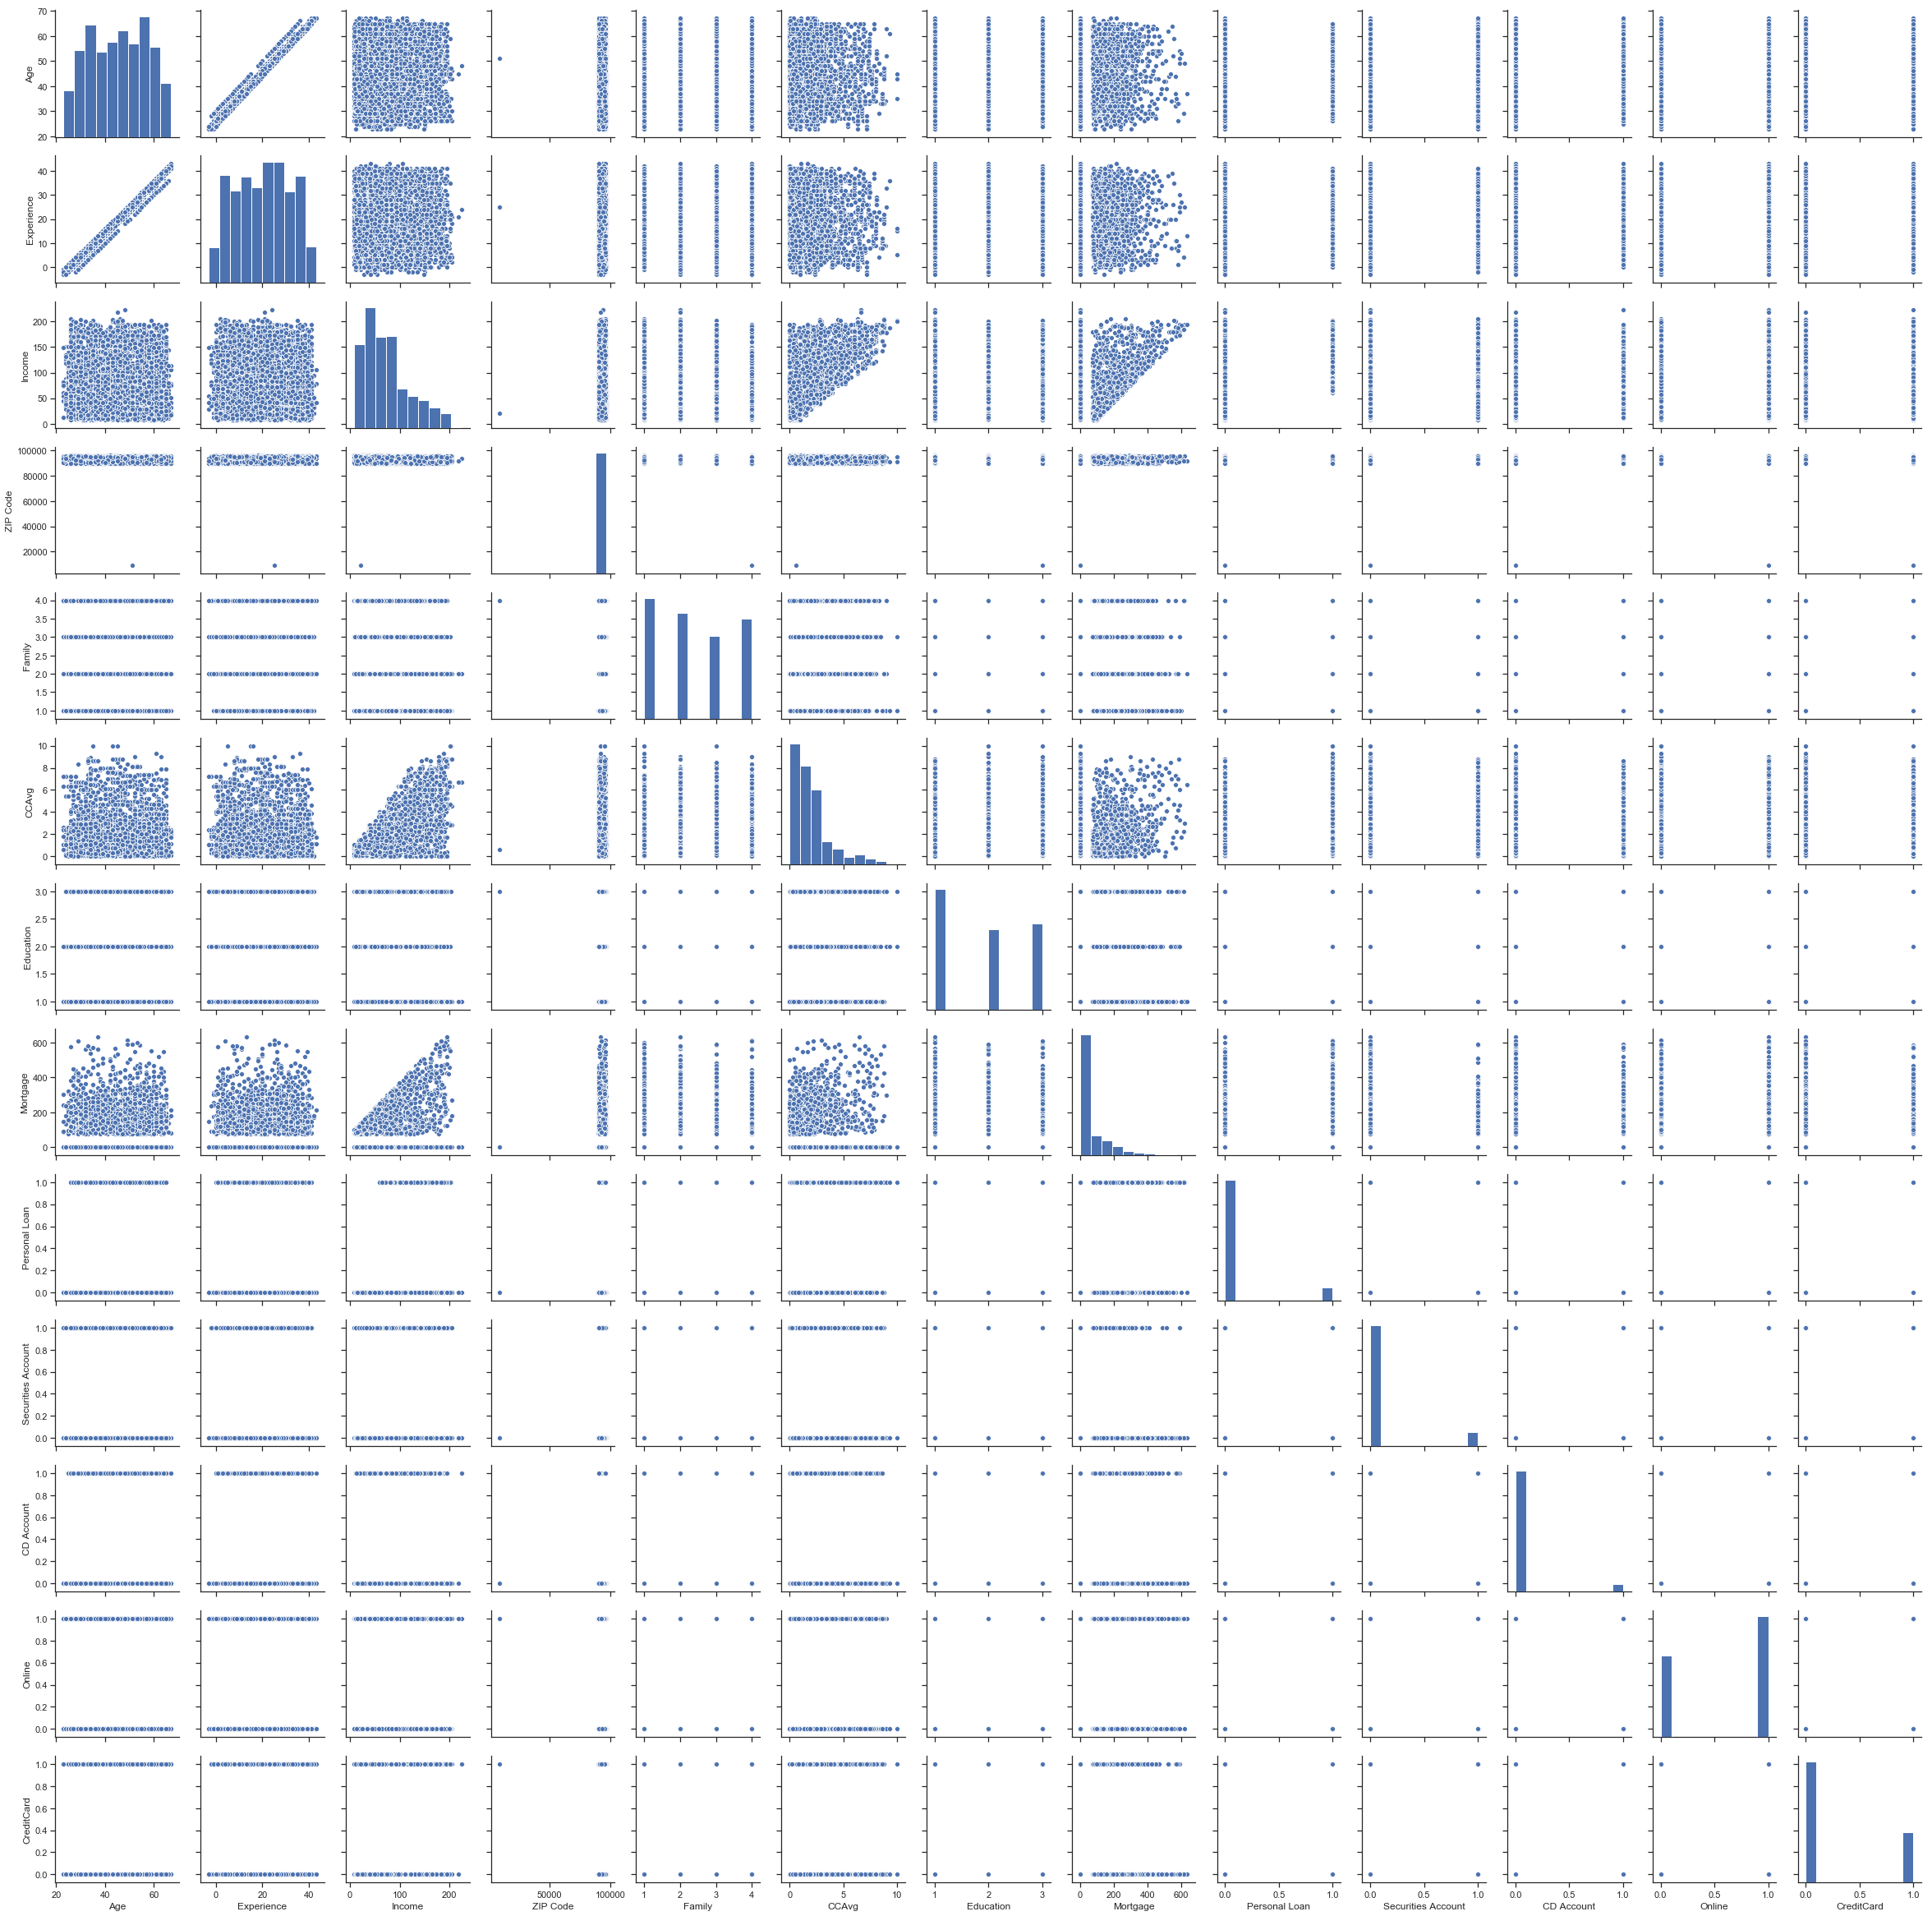

In [9]:
sns.pairplot(df.iloc[:,1:]) #pairplot, leaving out the column 'ID'

## 2. Study the data distribution in each attribute, share your findings

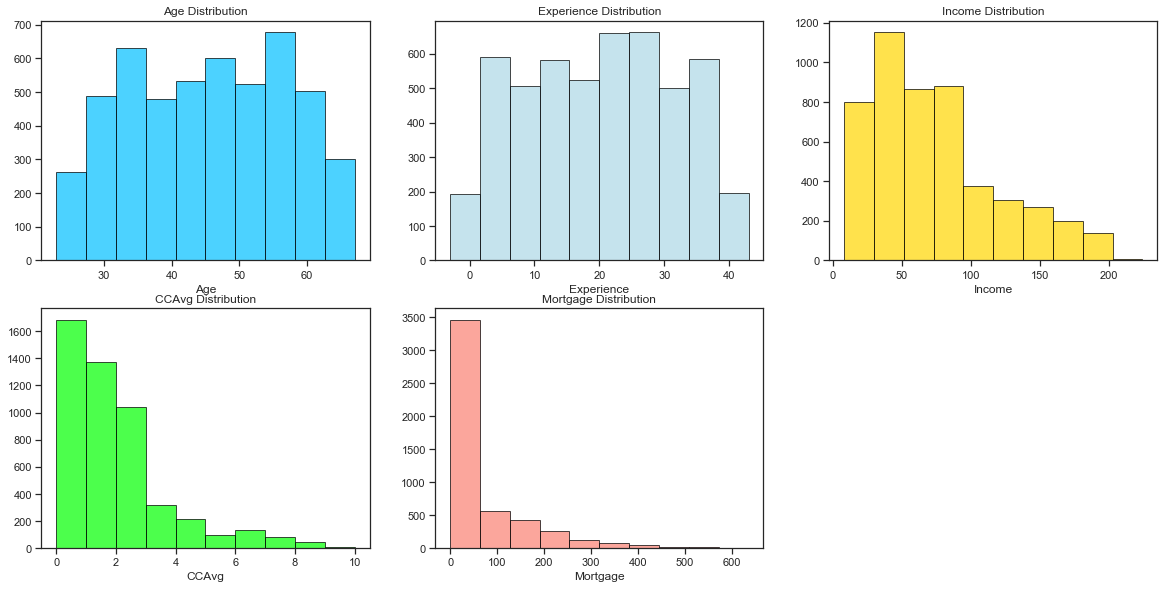

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.Age, color='deepskyblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')
plt.title('Age Distribution')

plt.subplot(3,3,2)
plt.hist(df.Experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')
plt.title('Experience Distribution')

plt.subplot(3,3,3)
plt.hist(df.Income, color='gold', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')
plt.title('Income Distribution')

print('\n')

plt.subplot(3,3,4)
plt.hist(df.CCAvg, color='lime', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')
plt.title('CCAvg Distribution')

plt.subplot(3,3,5)
plt.hist(df.Mortgage, color='salmon', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')
plt.title('Mortgage Distribution')

plt.show()

> **Age** variable is evenly distributed. Most of the customers are observerd to be inbetween 30 to 60 years of age. The mean is the median as observed in the data description

> **Experiance** variable is uniformly distributed. Experince of the customers ranges from 8 years to 36 years. Even here mean is median which can be observed the by above descriptive table. For uniform distribution median is same as the mean. **Negative** values for experience, which is unusual may be data error

> **Income** variable is positvely skewed. As per the observation from data description mean is higher than the median. Majority of the customers has income less than 50K

> **CCAvg** variable is also positvely skewed. As per the observation from table above mean is higher than the median. The average spending is between 0 to 10K

> **Mortgage** variable is extremely highly positively skewed data. The maximum data lies within 35K 

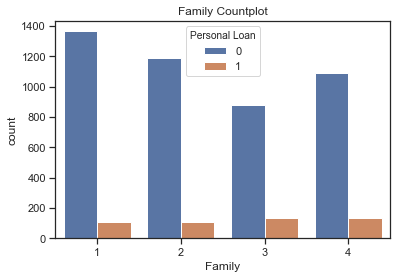

In [11]:
sns.countplot(x='Family', hue='Personal Loan', data=df)
plt.title('Family Countplot')

plt.show()

In [12]:
Family3_personalloan = df[df['Family'] == 3]['Personal Loan'].value_counts()   #To get the frequency distribution counts 
Family4_personalloan = df[df['Family'] == 4]['Personal Loan'].value_counts()   #for Family size 3 and 4 

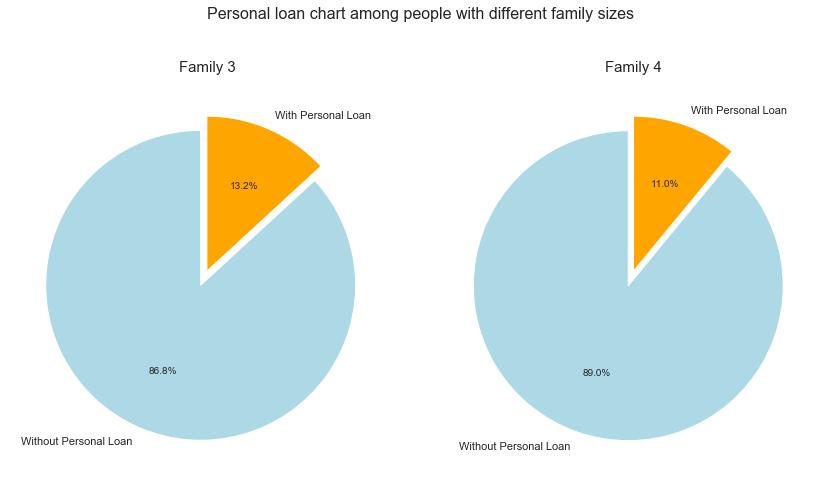

In [13]:
labels = 'Without Personal Loan', 'With Personal Loan'
colors = ['lightblue', 'orange']
explodeTuple = (0.1, 0.0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
fig.suptitle('Personal loan chart among people with different family sizes', fontsize=16, y=1.1)

ax1.pie(Family3_personalloan, labels=labels, autopct = '%.1f%%',colors=colors, startangle=90, explode = explodeTuple)
plt.tight_layout()
ax1.set_title('Family 3', fontsize=15) 

labels = 'Without Personal Loan', 'With Personal Loan'
colors = ['lightblue', 'orange']
explodeTuple = (0.1, 0.0)

ax2.pie(Family4_personalloan, labels=labels, autopct = '%.1f%%',colors=colors, startangle=90, explode = explodeTuple)
plt.tight_layout()
ax2.set_title('Family 4', fontsize=15)

plt.show()

In [14]:
Family1 = df[df['Family'] == 1]['Personal Loan'].value_counts()
Family1 = Family1[1]

Family2 = df[df['Family'] == 2]['Personal Loan'].value_counts()
Family2 = Family2[1]

Family3 = df[df['Family'] == 3]['Personal Loan'].value_counts()
Family3 = Family3[1]

Family4 = df[df['Family'] == 4]['Personal Loan'].value_counts()
Family4 = Family4[1]

In [15]:
FamilyandPersonalloan = Family1, Family2, Family3, Family4

In [16]:
FamilyandPersonalloan

(107, 106, 133, 134)

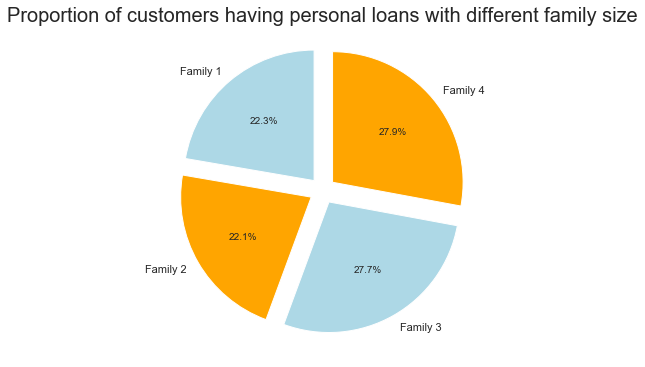

In [17]:
plt.figure(figsize=(12,5))
labels = ['Family 1',' Family 2','Family 3', 'Family 4']
explodeTuple = (0.1, 0.1, 0.1, 0.1)

plt.pie(FamilyandPersonalloan, labels=labels, autopct = '%.1f%%',colors=colors, startangle=90, explode = explodeTuple)
plt.tight_layout()
plt.title('Proportion of customers having personal loans with different family size', fontsize=20)
plt.show()

> **The above chart displays the percentage of people holding personal loan among people from 4 different family sizes**          
> **Family size 2 and Family 3 have higher proponation of loan holders** 

#### EDA on 'Education' and 'Personal Loan'

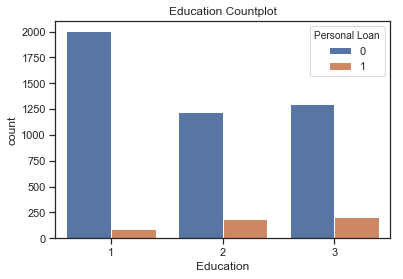

In [18]:
sns.countplot(x='Education', hue='Personal Loan', data=df)
plt.title('Education Countplot')

plt.show()

Let's get more details about the association of people's education to personal loans

In [19]:
PL_edu1 = df[df['Education'] == 1]['Personal Loan'].value_counts()
PL_edu2 = df[df['Education'] == 2]['Personal Loan'].value_counts()
PL_edu3 = df[df['Education'] == 3]['Personal Loan'].value_counts()

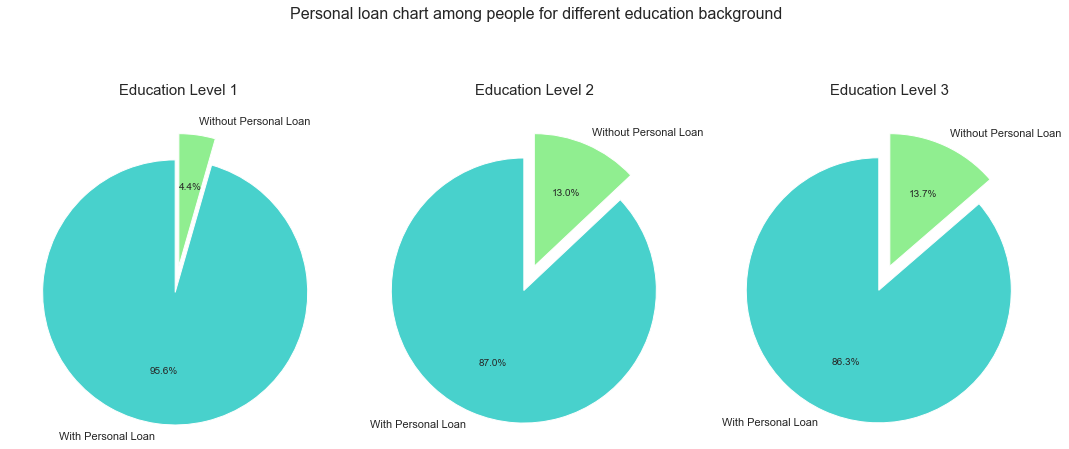

In [20]:
labels = 'With Personal Loan', 'Without Personal Loan'
colors = ['mediumturquoise', 'lightgreen']
explodeTuple = (0.2, 0.0)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,6))
fig.suptitle('Personal loan chart among people for different education background', fontsize=16, y=1.1)

ax1.pie(PL_edu1, labels=labels, autopct = '%.1f%%',colors=colors, startangle=90, explode = explodeTuple)
plt.tight_layout()
ax1.set_title('Education Level 1', fontsize=15) 

ax2.pie(PL_edu2, labels=labels, autopct = '%.1f%%',colors=colors, startangle=90, explode = explodeTuple)
plt.tight_layout()
ax2.set_title('Education Level 2', fontsize=15) 

ax3.pie(PL_edu3, labels=labels, autopct = '%.1f%%',colors=colors, startangle=90, explode = explodeTuple)
plt.tight_layout()
ax3.set_title('Education Level 3', fontsize=15) 

plt.show()

In [21]:
Education_personalloan = df[df['Personal Loan'] == 1]['Education'].value_counts()

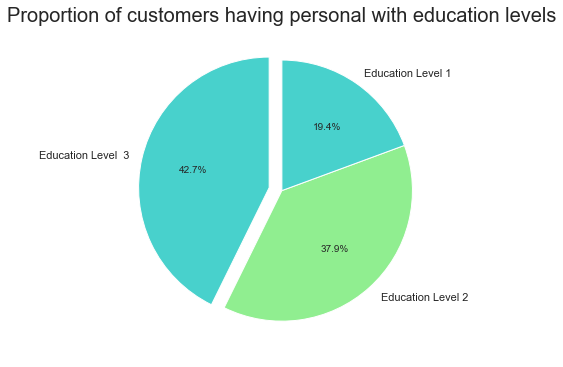

In [22]:
plt.figure(figsize=(12,5))
labels = ['Education Level  3',' Education Level 2','Education Level 1']
explodeTuple = (0.1, 0.0, 0.0)

plt.pie(Education_personalloan, labels=labels, autopct = '%.1f%%',colors=colors, startangle=90, explode = explodeTuple)
plt.tight_layout()
plt.title('Proportion of customers having personal with education levels', fontsize=20)
plt.show()

> **Personal Loan holders among people having Education Level 2 and Education Level 3 are higher in numbers when compared with people with Education Level 1**                                                                                                
> **Hence our target would be people with Education Level 1 and Level 2 who are more liable to personal loans** 

## 3. Get the target column distribution. Your comments 

In [23]:
loan_counts = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
loan_counts.columns = ['Labels', 'Personal Loan']

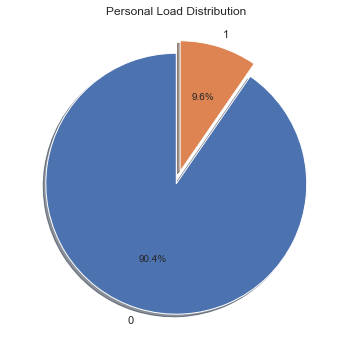

In [24]:
plt.figure(figsize=(13,6))
explode = (0,0.10)

plt.pie(loan_counts['Personal Loan'], labels=loan_counts['Labels'], explode=explode,  autopct='%1.1f%%',shadow=True, 
        startangle=90)
#fig.axis('equal')
plt.title('Personal Load Distribution')
plt.show()

> **As stated in the problem statement the Personal Loan accepted is 9.6% from 5000 customers (Instances) in the last personal loan campaign**

### Finding the correlation of each variable 

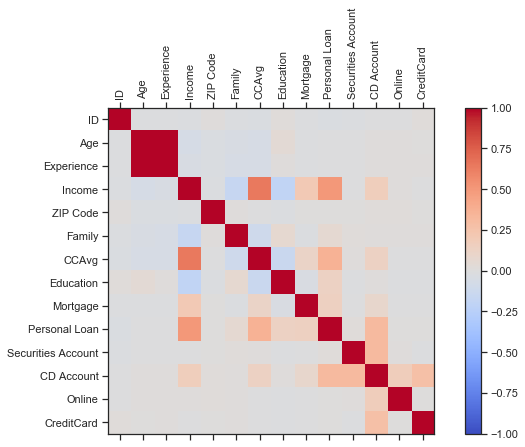

In [25]:
corr = df.corr()
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

> From the above correlation heatmap we can get the varaibles which has significant association with the target variable 'Personal Loan'. As per our observation variables [Income, CCAvg, Education, Mortgage and CD Account] have higher association on the target variable. Hence we would choose only these variables in our model building

Below is the list of variables and their correlation as per the above graph 

In [26]:
df[['Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Personal Loan']].corr() 

,Income,CCAvg,Education,Mortgage,CD Account,Personal Loan
Income,1.000000,0.645984,-0.187524,0.206806,0.169738,0.502462
CCAvg,0.645984,1.000000,-0.136124,0.109905,0.136534,0.366889
Education,-0.187524,-0.136124,1.000000,-0.033327,0.013934,0.136722
Mortgage,0.206806,0.109905,-0.033327,1.000000,0.089311,0.142095
CD Account,0.169738,0.136534,0.013934,0.089311,1.000000,0.316355
Personal Loan,0.502462,0.366889,0.136722,0.142095,0.316355,1.000000


**Lets get more details of the variables which impacts the target from the above results**  

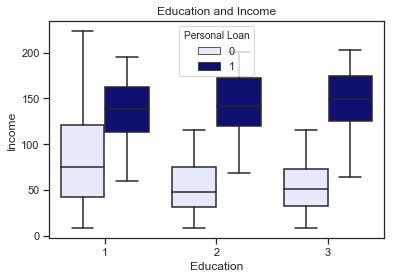

In [27]:
sns.boxplot(data=df, x='Education', y='Income', hue='Personal Loan', color='navy')
plt.title('Education and Income')

plt.show()

> **Remark:** Customers with higher education levels have lower income. Personal loan holders have same income

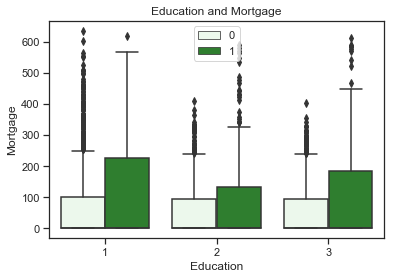

In [28]:
sns.boxplot(data=df, x='Education', y='Mortgage', hue='Personal Loan', color='forestgreen')
plt.legend(loc = 'upper center')
plt.title('Education and Mortgage')

plt.show()

> **Remark:** Customers with personal loan have high mortgage and customers who do not have personal loan almost have the similar mortgage

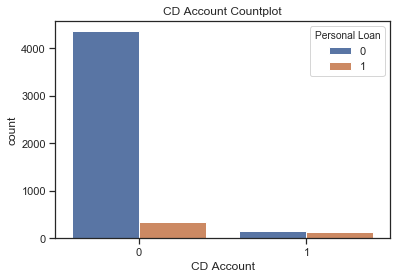

In [29]:
sns.countplot(x='CD Account', data=df, hue='Personal Loan')
plt.title('CD Account Countplot')

plt.show()

> **Remarks:** Personal Loans holders have CD accounts (Almost all of them), majority who does not have CD Accounts don't hold any personal loans 

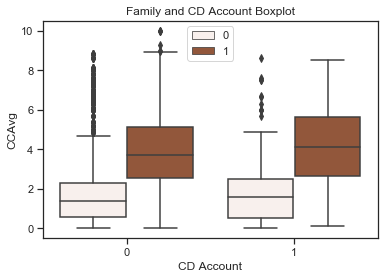

In [30]:
sns.boxplot(data=df, x='CD Account', y='CCAvg', hue='Personal Loan', color='sienna')
plt.legend(loc= 'upper center')
plt.title('Family and CD Account Boxplot')

plt.show()

> **Remarks:** Customers having CD Account holding personal loan have higher CC Avg compared to no CD Account customers 

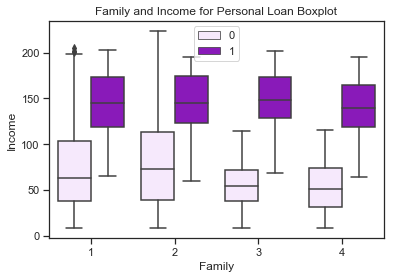

In [31]:
sns.boxplot(data=df, x='Family', y='Income', hue='Personal Loan', color='darkviolet')
plt.legend(loc = 'upper center')
plt.title('Family and Income for Personal Loan Boxplot')

plt.show()

> **Remarks:** Personal loans holders have income more than 100K. There are personal holders from all the family sizes

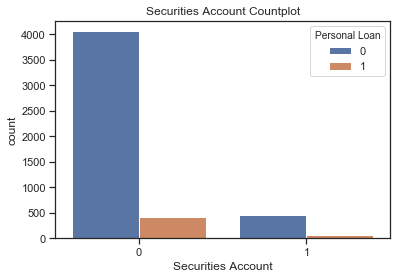

In [32]:
sns.countplot(data=df, x='Securities Account', hue='Personal Loan')
plt.title('Securities Account Countplot')

plt.show()

> **Remarks:** Customers who do not hold Securities Accouts does not have personal loans, whereas from customers having Securities Accounts very few has personal loans 

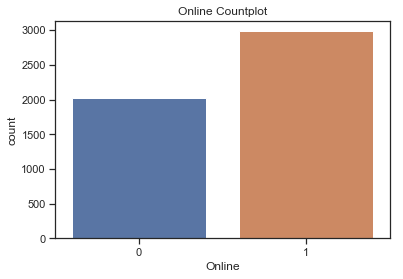

In [33]:
sns.countplot(data=df, x='Online')
plt.title('Online Countplot')

plt.show()

> **Remarks:** Proportion of customers using inernet banking facilities is higher

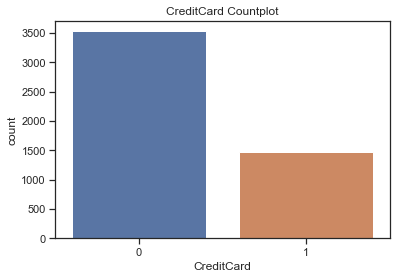

In [34]:
sns.countplot(data=df, x='CreditCard')
plt.title('CreditCard Countplot')

plt.show()

> **Remarks:** Seems like less number of customers uses Credit Cards providing by the Bank 

**Create two variables X & y and assign features to variable X variable and assing target variable to y** 

In [35]:
X = df[['Income', 'CCAvg', 'Mortgage', 'Education', 'CD Account']]
y = df['Personal Loan']

### Standardize the data so that the distribution standard deviation from the mean in one 

In [36]:
from sklearn import preprocessing

In [37]:
X = preprocessing.scale(X)

### Machine Learning algorithms, classifiers used for building the model

**Naive Bayes:** Model used to classify objects based on certain features. It is based on Bayes theorem. It assumes the the features are independent.  
Naive Bayes classifier calculates the probabilities for every factor, then selects the outcome with highest probability.       

**K-Nearest Neighbours:** KNN is non-parametric algorithm, means no assumptionfor the underlying data distributions. It assumes that similar things exist in close proximity (similar things are near to each other). KNN captures the idea of similarity (called distance, proximity, closeness) calculating the distance between points.

**Logistic Regression:** The goal is to correctly predict the category of outcome. Is is a predictive analysis algorithm and based on the concept of probability. It used 'Sigmoid function' as cost function also know as 'Logistic function' 

### Evaluation Matric used for the models

**F1 Score:** F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0,1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust the model is. The greater the F1 Score, the better the performance of our model. F1 Score tries to find the balance between precision and recall

**Confusion Matrix:** Gives us a matrix as output and describes the complete performance of the model. 
There are 4 important terms:
True Positives: The cases in which we predicted YES and the actual output was also YES
True Negatives: The cases in which we predicted NO and the actual output was NO
False Positves: The cases in which we predicted YES and the actual output was NO
False Negatives: The cases in which we predicted NO and the actual output was YES

**Accuracy:** Accuracy of the matrix can be calculated by taking the average of the values lying across the 'main diagonal'

#### Before we jump into model building we need to split the datasets 

## 4. Split the data into training and test set in the ratio of 70:30 respectively

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=100)

## Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

### Naive Bayes

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
NB_predict = naive_model.predict(X_test)

In [41]:
print('**Accuracy for Naive Bayes classifier is:', metrics.accuracy_score(y_test, NB_predict))
print('**F1_score for Logistic Regression classifier is:', metrics.f1_score(y_test, NB_predict))
print('\n')
print('**Confusion matrix', '\n', confusion_matrix(y_test, NB_predict))

**Accuracy for Naive Bayes classifier is: 0.882
**F1_score for Logistic Regression classifier is: 0.5177111716621254


**Confusion matrix 
 [[1228  114]
 [  63   95]]


In [42]:
confusion_matrix_NB = confusion_matrix(y_test, NB_predict)

In [43]:
from mlxtend.plotting import plot_confusion_matrix

## 6. Print the confusion matrix for all the above models

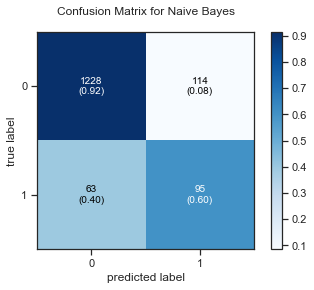

In [44]:
plot_confusion_matrix(conf_mat=confusion_matrix_NB, show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

>  - The classifier made a total of 1500 predictions (1500 customers data were being tested)       
>  - Out of 1500 customers, the classifier predicted 'yes' 209 times and 'no' 1291 times                                      
>  - In reality, 158 customers in the sample belongs to 'yes' and 1342 to 'no'                                                 
>  - Accuracy rate (Overall, how often the classifier is correct) is measured by TP+TN / TP+TN+FP+FN. The objective of the model is have lesser False Positive and Falase Negetive values. 

> **Result:** This model has achieved **88%** accuracy. F1 score is **51%**

Let's check the results of the other models. 

### KNN (K Nearest Neigbhour) 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

**Choosing a K value**

Using the elbw method to pick a good K value

In [46]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

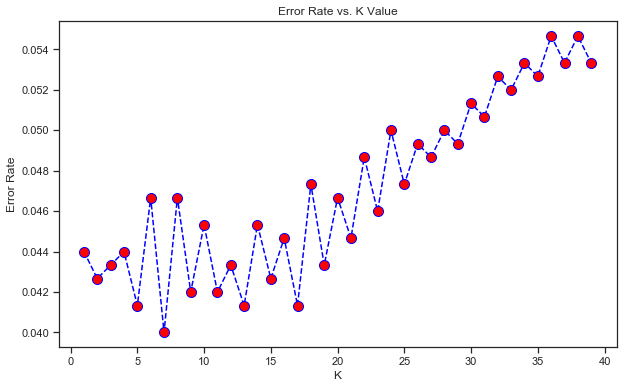

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

> Here we can see the before K < 5 the error rate just tends to hover around 0.044-0.043. I would like to train the model with that and check the accuracy  

In [48]:
#FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.956

In [49]:
#Now with K=5

KNN_model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
KNN_model.fit(X_train, y_train)
knn_predict = KNN_model.predict(X_test)

print('**Accuracy for KNN classifier is:', metrics.accuracy_score(y_test, knn_predict))
print('**F1_score for KNN classifier is:', metrics.f1_score(y_test, knn_predict))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, knn_predict))

**Accuracy for KNN classifier is: 0.9606666666666667
**F1_score for KNN classifier is: 0.7915194346289751


Confusion matrix 
 [[1329   13]
 [  46  112]]


## 6. Print the confusion matrix for all the above models

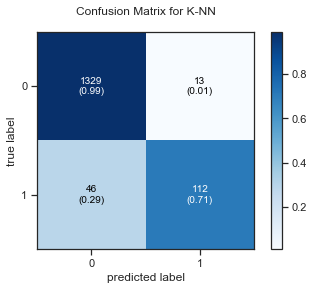

In [50]:
confusion_matrix_knn = confusion_matrix(y_test, knn_predict)

plot_confusion_matrix(conf_mat=confusion_matrix_knn, show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for K-NN')

plt.show()

>  - The classifier made a total of 1500 predictions (1500 customers data were being tested)       
>  - Out of 1500 customers, the classifier predicted 'yes' 125 times and 'no' 1375 times                                      
>  - In reality, 158 customers in the sample belongs to 'yes' and 1342 to 'no'                                                 
>  - Accuracy rate (Overall, how ofte the classifier is correct) is measured by TP+TN / TP+TN+FP+FN. The objective of the model is have lesser False Positive and Falase Negetive values 

> **Result:** The accuracy achieved by this model is **96%**. The FP + FN values are less when compared to earlier model and F1 score is **79%**

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

logit_predict = logit_model.predict(X_test)

print('Accuracy for Logistic Regression model is:', metrics.accuracy_score(y_test, logit_predict))
print('F1_score for Logistic Regression model is:', metrics.f1_score(y_test, logit_predict))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, logit_predict))

Accuracy for Logistic Regression model is: 0.94
F1_score for Logistic Regression model is: 0.6616541353383458


Confusion matrix 
 [[1322   20]
 [  70   88]]


C:\Users\nagarc1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 6. Print the confusion matrix for all the above models

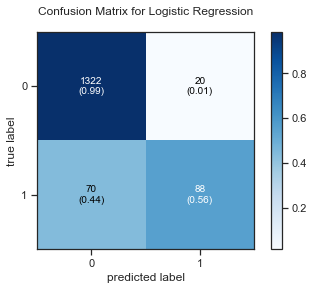

In [52]:
confusion_matrix_LR = confusion_matrix(y_test, logit_predict)

plot_confusion_matrix(conf_mat=confusion_matrix_LR, show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Logistic Regression')

plt.show()

>  - The classifier made a total of 1500 predictions (1500 customers data were being tested)       
>  - Out of 1500 customers, the classifier predicted 'yes' 108 times and 'no' 1392 times                                      
>  - In reality, 158 customers in the sample belongs to 'yes' and 1342 to 'no'                                                 
>  - Accuracy rate (Overall, how ofte the classifier is correct) is measured by TP+TN / TP+TN+FP+FN. The objective of the model is have lesser False Positive and Falase Negetive values

> **Result:** Accuracy is **94%** and F1 Score is **66%**

## 7. Give your reasoning on which is the best model in this case and why it performs better

### **Conclude:** 
Out of three models K-NN model comparetively performance better with Acuuracy at 96% and F1 Score at 79%. The error rate between the acutual and the predictions are less. 

We choose K-NN as our model. 

### Thank you